# Tu primer árbol de decisión con scikit-learn

In [1]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [2]:
#Cargamos dataset a utilizar
titanic = pd.read_csv('titanic.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Exploración de datos

In [3]:
#Eliminamos las columnas que no nos interesan
columns_to_drop = ['Name','Fare']
titanic.drop(columns_to_drop, axis = 'columns', inplace = True)

titanic.head(2)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0


In [4]:
#Renombramos las columnas
titanic.columns = ['Survived','Pclass','Sex','Age','SibSp','Parch']     # Renombramos de forma directa el nombre de las columnas
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0


In [5]:
#Analizamos el shape del objeto
print(titanic.shape)

(887, 6)


In [6]:
#Visualizamos los tipos de datos
titanic.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [7]:
#Cambiamos los tipos de datos
titanic.Sex = titanic.Sex.apply(lambda x: 1 if x == 'male' else 0)
titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0


In [8]:
titanic.dtypes  # Varificamos el cambio aplicado

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
dtype: object

## Entrenamiento de árbol de decisión con scikit-learn

In [9]:
#Separamos en X e y
from sklearn.model_selection import train_test_split

X = titanic.drop("Survived", axis  = 1)
y = titanic.Survived


#30% para test y 70% para train
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


In [10]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier # Modelo de clasificacion

#Creacion del modelo

model_tree = DecisionTreeClassifier(max_depth=2, random_state= 42)

model_tree.fit(x_train,y_train)  # Entrenamos el modelo




DecisionTreeClassifier(max_depth=2, random_state=42)

## Evaluación del modelo

In [11]:
#Calculo de las predicciones en Train y Test
y_train_pred = model_tree.predict(x_train)
y_test_pred = model_tree.predict(x_test)



In [12]:
from sklearn.metrics import accuracy_score

#Calculo de metricas 

#Calculo el accuracy en Train
train_accuracy =  accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

In [13]:
train_accuracy, test_accuracy

(0.8064516129032258, 0.7378277153558053)

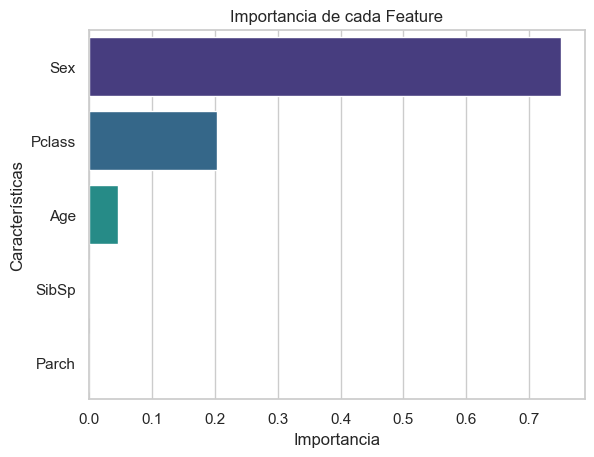

In [14]:
# Verificamos el feature importance

import seaborn as sns
import matplotlib.pyplot as plt

# Obtenemos las importancias de las características
importances = pd.Series(model_tree.feature_importances_, index=X.columns.values).sort_values(ascending=False)

# Configuramos la paleta de colores y la saturación
sns.set(style="whitegrid")  # Configuración del estilo
palette = sns.color_palette("viridis", len(importances))  # Paleta de colores personalizada

# Creación del gráfico de barras
sns.barplot(x=importances, y=importances.index, palette=palette, hue=importances.index, saturation=0.9, legend=False)

# Añadimos título y etiquetas
plt.title('Importancia de cada Feature')
plt.xlabel('Importancia')
plt.ylabel('Características')

# Mostramos el gráfico
plt.show()


In [15]:
import recursos_graficos as rg
rg.multiple_histogram(titanic, 'Survived','Sex')

Sobrevivieron mas mujeres xd 

**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo. 

# Random Forest Model


In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=9, random_state=69)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=9, random_state=69)

In [29]:
# Calculo de las predicciones

y_train_pref = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

In [30]:
accuracy_score(y_train, y_train_pref)


0.9241935483870968

In [31]:
accuracy_score(y_test, y_test_pred)

0.7827715355805244

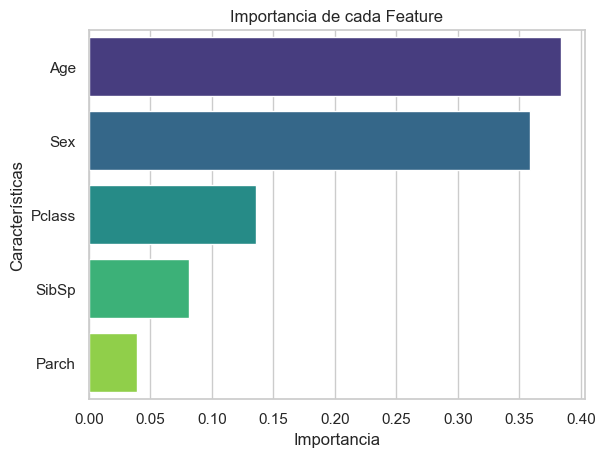

In [32]:
# Visualizacion de las feature importantes

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Configuramos la paleta de colores y la saturación
sns.set(style="whitegrid")  # Configuración del estilo
palette = sns.color_palette("viridis", len(importances))  # Paleta de colores personalizada

# Creación del gráfico de barras
sns.barplot(x=importances, y=importances.index, palette=palette, hue=importances.index, saturation=0.9, legend=False)

# Añadimos título y etiquetas
plt.title('Importancia de cada Feature')
plt.xlabel('Importancia')
plt.ylabel('Características')

# Mostramos el gráfico
plt.show()